In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import reconstruction

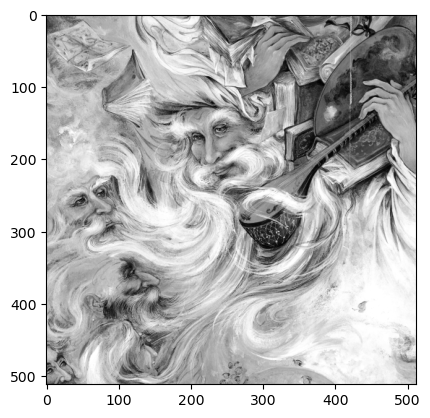

In [2]:
pic_name = 'Del polvo al polvo (Detalle) 1999 Obras maestras de la miniatura persa; Artista Profesor Mahmud Farshchian, Irn.jpg'
pic_path = 'test_pics/Downloaded Persian Miniatures - Cropped and Resized' + '/' + pic_name

pic = reconstruction.createPicArrayFromPath (pic_path, '')

plt.imshow (pic, cmap='gray')
plt.show ()


In [3]:
def createNeighborhoodVector (pic: np.ndarray, coordinates: tuple) -> list:
    m, n = coordinates[0], coordinates [1]
    return           [pic [m, n-1], 
                      pic [m-1, n-1],
                      pic [m-1, n],
                      pic [m-1, n+1]]

def convertPicInt8ToFloat32 (pic: np.ndarray) -> np.ndarray:
    return np.array (pic, dtype='float32')

def normalizePic (pic: np.ndarray) -> np.ndarray:
    return pic / 255.0;

def createArrayofNeighborhoodVectors (pic: np.ndarray) -> np.ndarray:
    temp = []

    for i in range (pic[1:, 1:-1].shape [0]):
        for j in range (pic[1:, 1:-1].shape [1]):
            temp.append (createNeighborhoodVector (pic, (i, j)))

    neighborhood_vectors_array = np.array (temp, dtype='float32')

    return neighborhood_vectors_array

x1 = createNeighborhoodVector (pic, (2,2))

x1

[123, 128, 135, 139]

In [4]:
pic [1:, 1:-1].ravel ()

array([128, 135, 139, ..., 212, 210, 207], dtype=uint8)

In [5]:
y_values = np.array (pic[1:, 1:-1].ravel (), dtype='float32') / 255.0

y_values

array([0.5019608 , 0.5294118 , 0.54509807, ..., 0.83137256, 0.8235294 ,
       0.8117647 ], dtype=float32)

In [ ]:
neighborhood_vectors_array = createArrayofNeighborhoodVectors (pic) / 255.0

neighborhood_vectors_array

array([[0.62352943, 0.8117647 , 0.5019608 , 0.4745098 ],
       [0.54901963, 0.5019608 , 0.4745098 , 0.4862745 ],
       [0.54901963, 0.4745098 , 0.4862745 , 0.49803922],
       ...,
       [0.8117647 , 0.8156863 , 0.8       , 0.80784315],
       [0.8156863 , 0.8       , 0.80784315, 0.83137256],
       [0.8039216 , 0.80784315, 0.83137256, 0.81960785]], dtype=float32)

In [7]:
neighborhood_vectors_array.shape

(260610, 4)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import keras

model = Sequential ()
model.add (keras.layers.Input ((4,)))
# model.add (Flatten (input_shape = (4,)))
# model.Input ((4,))
# model.add (Dense (units=(4,)))
model.add (Dense (6, activation='tanh'))
model.add (Dense (3, activation='tanh'))
model.add (Dense (1, activation='sigmoid'))


model.compile (optimizer='adam', loss = 'mean_squared_error')

In [9]:
model.fit (neighborhood_vectors_array, y_values, epochs = 10)

Epoch 1/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0134
Epoch 2/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0063
Epoch 3/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0063
Epoch 4/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0062
Epoch 5/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0062
Epoch 6/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0062
Epoch 7/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0061
Epoch 8/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0062
Epoch 9/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0062
Epoch 10/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0062


In [10]:
prediction = model.predict (neighborhood_vectors_array)

8145/8145 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


In [23]:
model.save (filepath='saved_prediction_model.keras')

In [11]:
prediction

array([[0.53196204],
       [0.5272579 ],
       [0.5363126 ],
       ...,
       [0.79996157],
       [0.81650335],
       [0.8061293 ]], dtype=float32)

In [12]:
prediction.shape

(260610, 1)

In [13]:
reconstructed = (prediction * 255.0).reshape (pic [1:, 1:-1].shape)

In [14]:
reconstructed

array([[135.65031, 134.45078, 136.7597 , ..., 178.70186, 177.8061 ,
        179.2176 ],
       [144.33267, 136.38837, 144.33202, ..., 143.08752, 146.41718,
        146.82143],
       [139.22934, 136.45761, 135.34438, ..., 129.63005, 140.84593,
        141.79124],
       ...,
       [171.45702, 157.93369, 157.73009, ..., 207.05019, 209.36133,
        204.2139 ],
       [170.20883, 143.98184, 150.47008, ..., 206.80891, 200.1977 ,
        199.67339],
       [164.68451, 138.44139, 139.94276, ..., 203.9902 , 208.20836,
        205.56297]], dtype=float32)

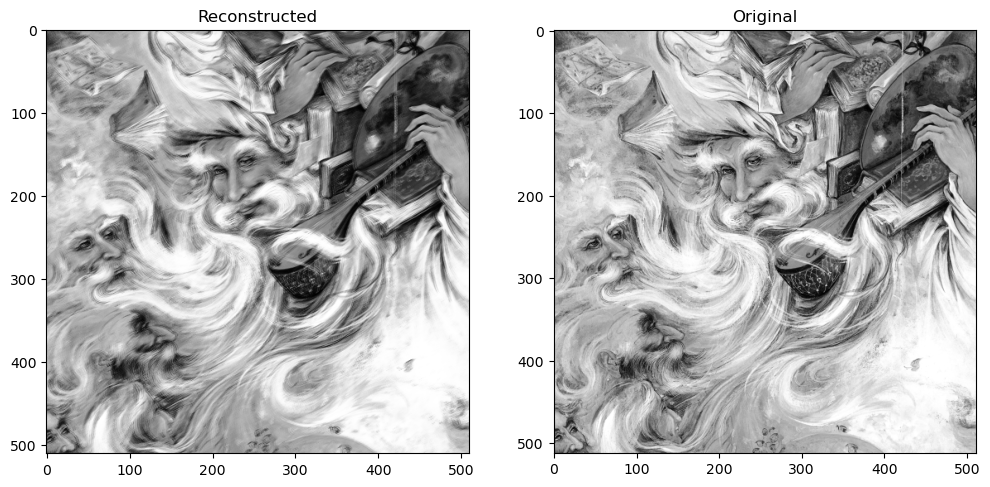

In [15]:
plt.figure (figsize=(12, 7))

plt.subplot (1,2,1)
plt.imshow (reconstructed, cmap='gray')
plt.title ('Reconstructed')

plt.subplot (1,2,2)
plt.imshow (pic, cmap='gray')
plt.title ('Original')

plt.show ()

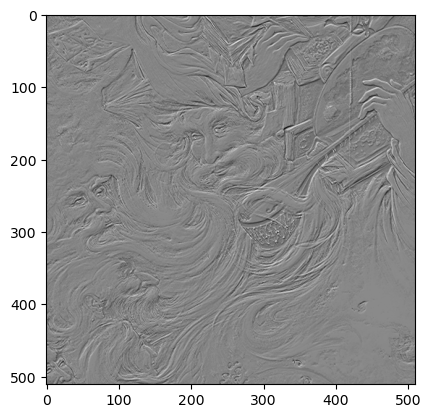

In [16]:
diff_matrix = reconstruction.createDiffMatrixFromMatrices (pic [1:, 1:-1], reconstructed)

plt.imshow (diff_matrix, cmap='gray')
plt.show ()

In [17]:
diff_matrix

array([[ -7.6503143 ,   0.54922485,   2.2402954 , ..., -46.70186   ,
        -31.806107  , -35.217606  ],
       [-21.332672  , -11.388367  , -11.332016  , ..., -12.087524  ,
         -0.4171753 ,  -0.8214264 ],
       [-17.22934   , -11.457611  ,  -0.3443756 , ...,   4.3699493 ,
          1.154068  ,   2.2087555 ],
       ...,
       [-35.457016  , -23.933685  ,  -7.7300873 , ...,  -1.0501862 ,
          2.6386719 ,   4.7861023 ],
       [-48.20883   ,  -8.981842  , -16.470078  , ...,  -1.8089142 ,
          7.802307  ,   4.3266144 ],
       [-43.68451   , -14.441391  , -12.942764  , ...,   8.009796  ,
          1.7916412 ,   1.437027  ]], dtype=float32)

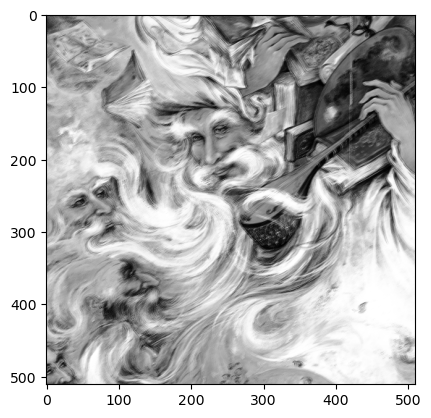

In [18]:
plt.imshow (np.array (reconstructed, dtype='uint8'), cmap='gray')
plt.show ()

In [21]:
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity
from skimage.measure.entropy import shannon_entropy

mse_score = mean_squared_error (pic [1:, 1:-1], reconstructed)
ssim_score = structural_similarity (pic [1:, 1:-1], np.array (reconstructed, dtype='uint8'))
entropy_score = shannon_entropy (diff_matrix)

print ('MSE Score: ', mse_score)
print ('SSIM Score: ', ssim_score)
print ('Entropy Score: ', entropy_score)

MSE Score:  399.16492
SSIM Score:  0.5175218766107421
Entropy Score:  17.822688238707475


Linear MSE Score:  441.31083992940034
Linear SSIM Score:  0.755968807905708
Linear Entropy Score:  17.84654248476009


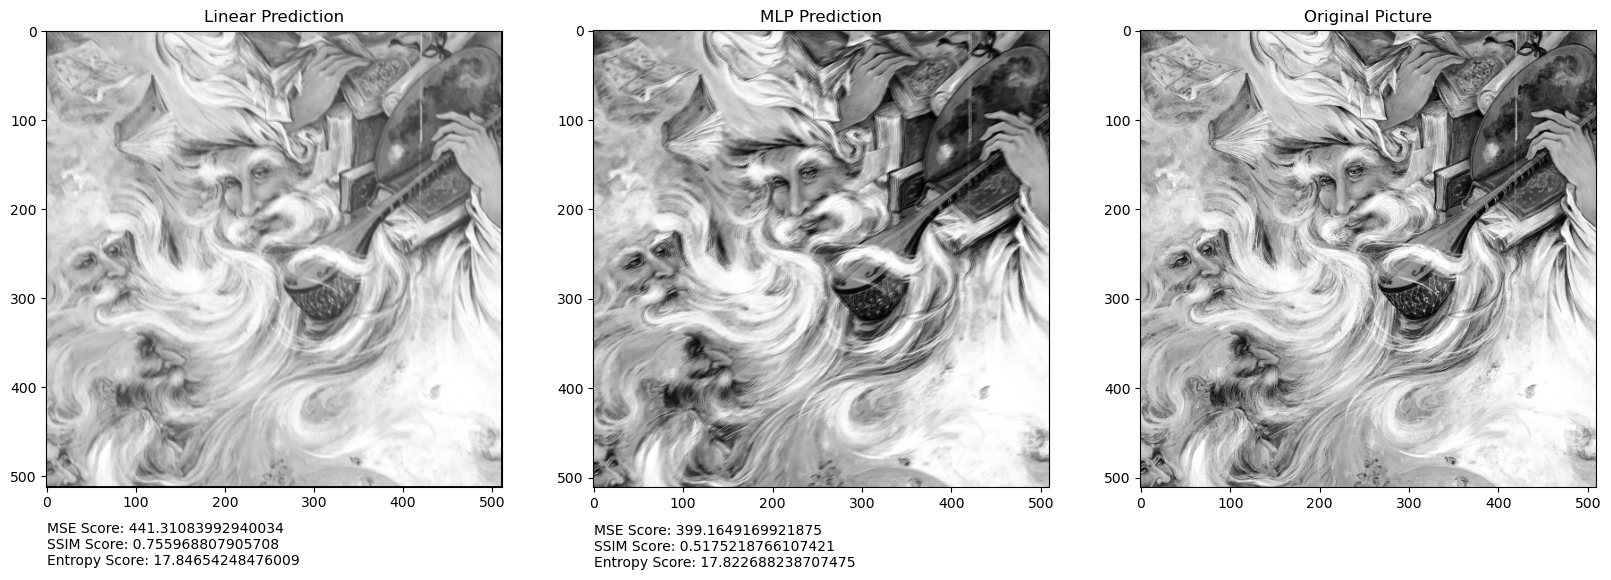

In [20]:
linear_reconstructed = reconstruction.reconstructPicfromACoefs (np.array ([0.33561862, 0.1901073, 0.25668775, 0.2178371]), pic) # ACoefs Optimized


linear_mse_score = mean_squared_error (pic, linear_reconstructed)
linear_ssim_score = structural_similarity (pic , np.array (linear_reconstructed, dtype='uint8'))
linear_entropy_score = shannon_entropy (reconstruction.createDiffMatrixFromMatrices (pic, linear_reconstructed))


print ('Linear MSE Score: ', linear_mse_score)
print ('Linear SSIM Score: ', linear_ssim_score)
print ('Linear Entropy Score: ', linear_entropy_score)

plt.figure (figsize=(20,15))

plt.subplot (1,3,1)
plt.imshow (linear_reconstructed, cmap='gray')
plt.title ('Linear Prediction')
plt.text (0, 600, 'MSE Score: {}\nSSIM Score: {}\nEntropy Score: {}'.format(linear_mse_score, linear_ssim_score, linear_entropy_score))

plt.subplot (1,3,2)
plt.imshow (np.array (reconstructed, dtype='uint8'), cmap='gray')
plt.title ('MLP Prediction')
plt.text (0, 600, 'MSE Score: {}\nSSIM Score: {}\nEntropy Score: {}'.format(mse_score, ssim_score, entropy_score))

plt.subplot (1,3,3)
plt.imshow (pic [1:,1:-1], cmap='gray')
plt.title ('Original Picture')

plt.show ()